In [1]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
# local imports
import DataAndPlotting as my
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Data\\'

# Data

In [2]:
# store files names for all datasets
filenames: dict[str,str] = {
   'I1mA t1'   : path_data + 'a-I1ma_trial1_table.csv', 
   'I1mA t2'   : path_data + 'a-I1ma_trial2_table.csv', 
   'U35kV t1'  : path_data + 'b-U35kv_trial1.csv', 
   'U35kV t2'  : path_data + 'b-U35kv_trial2.csv', 
} # t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

I1mA t1 columns:	 ['n&l / pm', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s', 'R_5 / 1/s']
I1mA t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s']
U35kV t1 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']
U35kV t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']


In [3]:
def UnpackTable(fname: str) -> dict[str,np.array] :
    """Get a table dictionary like {x: xdata, y: ydata} from a CSV file containing data""" 
    # get data from the csv file
    arr = np.genfromtxt(fname, delimiter=",", dtype=str)
    # separate column names and data arrays 
    cols = np.array(arr[0 ], dtype=str)
    data = np.array(arr[1:], dtype=float).T # transpose to get x and y
    # build dictionary to hold the table {x: xdata, y: ydata}
    table = {}
    for col, dat in zip(cols,data) : 
        table[col] = dat
    return table

def UnpackAllTables(filenames: dict[str,str]) -> dict[str, dict[str, np.array]] : 
    """Unpack all tables in the filenames dictionary."""
    tables: dict[str, dict[str, np.array]] = {}
    for experiment, file in filenames.items() :
        # extract data from file 
        tables[experiment] = UnpackTable(file)
        # print some helpful info 
        print(experiment, 'columns:\t', list(tables[experiment].keys() ))
    return tables

tables: dict[str, dict[str, np.array]] = UnpackAllTables(filenames)

I1mA t1 columns:	 ['n&l / pm', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s', 'R_5 / 1/s']
I1mA t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s']
U35kV t1 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']
U35kV t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']


# Plots

Notes from the Prof. 10/10/23
* try to fit a continuous curve to the brehmstralung radiation, ignoring peaks
   * try to charactarize the first initial increace in brehmstralung (steep vertical slope)
   * try to calculate the log-linear slope decreace towards increacing wavelength
* Calculate background to peak difference between brehmastralung and emission line. Increace in voltage increaces the probability of emission line photon
* determine the wavelength of the emission lines

https://en.wikipedia.org/wiki/Bremsstrahlung 

https://en.wikipedia.org/wiki/Kramers%27_law 
* Kramers' law is a formula for the spectral distribution of X-rays produced by an electron hitting a solid target. The formula concerns only bremsstrahlung radiation, not the element specific characteristic radiation.
* $I\left(\lambda\right)\ =\ K\left(\frac{\lambda}{\lambda_{min}}-1\right)\left(\frac{1}{\lambda^{2}}\right)$ where $\lambda$ is wavelength and $I$ is photon count/intensity. The constant K is proportional to the atomic number of the target element.
* K --> Element Molybdenum (Mo), Group 6, Atomic Number 42

https://en.wikipedia.org/wiki/Duane%E2%80%93Hunt_law
* $\lambda_{min}$ is decribed by Duane–Hunt law
* $\lambda = \frac{hc}{eV} \approx \frac{1239.8 pm}{V}$ where $V$ is voltage in kV.



In [92]:
def DuaneHunt(voltage: float) -> float : 
    # $\lambda = \frac{hc}{eV} \approx \frac{1239.8 pm}{V}$ where $V$ is voltage in kV.
    return float(1239.8/voltage)

def Kramer(wavelength: np.array, voltage: float, atomicNumber: int = 42) : 
    minWavelength = DuaneHunt(voltage)
    ratio = (wavelength / minWavelength)
    squared = (wavelength)**2
    return float(atomicNumber) * ( ratio - 1.0 ) * (1.0 / squared)

-74.0
-0.013513513513513514
1.0


(25.6, 122.1)

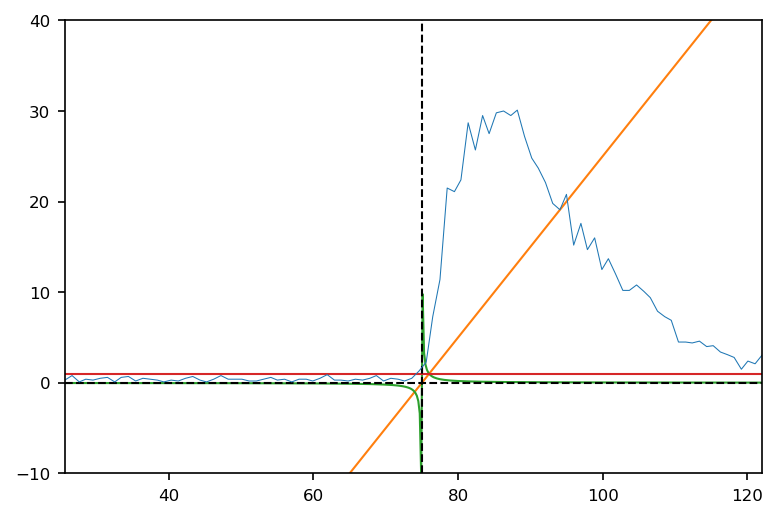

In [143]:
def line(x, x0) : return (x/x0 -1)
def xInterceptLine(x, m, x0) : return(m*(x-x0)) 
def asymptotic(x, b, x0) : return(1/(x-x0) + b)


x = np.linspace(1,200,1000)

x0 = 75
m = 1
yasym = 0
x1 = 85

# data
xdta = tables['I1mA t1']['n&l / pm']
ydta = tables['I1mA t1']['R_5 / 1/s']
plt.errorbar(xdta, ydta, yerr=0, xerr=0, elinewidth=0.8, linewidth=0.5)

y1 = xInterceptLine(x,m,x0)
plt.plot(x,y1)

y2 = asymptotic(x,yasym,x0)
plt.plot(x,y2)

y3 = np.multiply(y1,y2)
plt.plot(x,y3)

print(y1[0])
print(y2[0])
print(y1[0] * y2[0])
plt.hlines(0, xdta[0], xdta[-1], linestyles='dashed', colors='k')
plt.vlines(x0, -10,50, linestyles='dashed', colors='k')
plt.ylim(-10,40)
plt.xlim(xdta[0], xdta[-1])

In [77]:
def PlotXmanyY_fitOne(
    x: np.array, # x axis data points
    y: list[np.array], # y axis data points
    v : float, # voltage in kV
    yleg : list[str], # legend lables 
    c : list, # colors
    fitMultiply : float = 1.0,
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    if(logScale) : ax.set_yscale('log')
    # fitting
    xFit = x
    yFit = Kramer(xFit, v) * fitMultiply
    plt.plot(xFit,yFit, c=c[-1], label='Fit')
    # data
    for yi,yl,ci in zip(y,yleg,c) : 
        plt.errorbar(x, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    plt.legend()
    # finish 
    if(fileName != '') : my.Save(fileName)
    plt.show()

# A. 

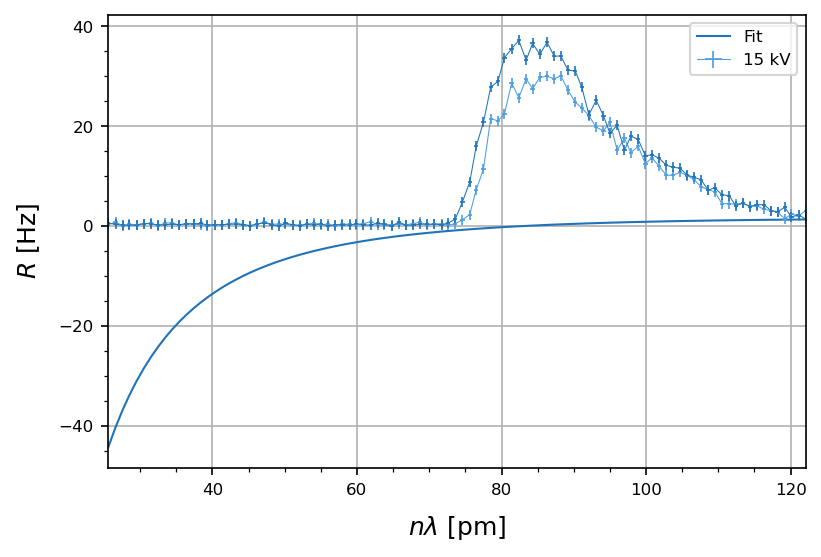

In [78]:
PlotXmanyY_fitOne(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_5 / 1/s'],
         tables['I1mA t2']['R_0 / 1/s']],
    v = 15.0,
    fitMultiply = 1000,
    yleg = ['15 kV',None],
    c = [my.color5[0],my.color5_dark[0]],
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    # fileName = path_fig + 'a-I1mA_t1.png' 
)

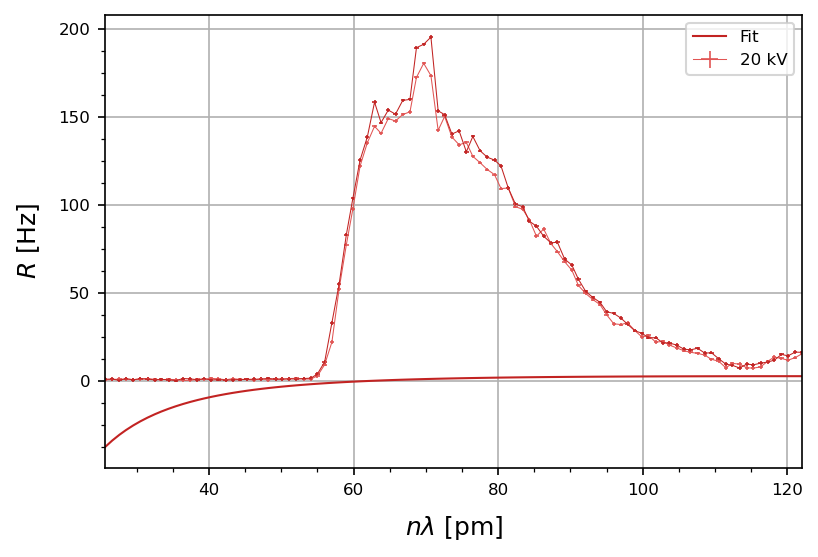

In [85]:
PlotXmanyY_fitOne(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_1 / 1/s'],
         tables['I1mA t2']['R_1 / 1/s']],
    v = 20.0, fitMultiply=1000,
    yleg = ['20 kV',None],
    c = [my.color5[1],my.color5_dark[1]],
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    # fileName = path_fig + 'a-I1mA_t1.png' 
)

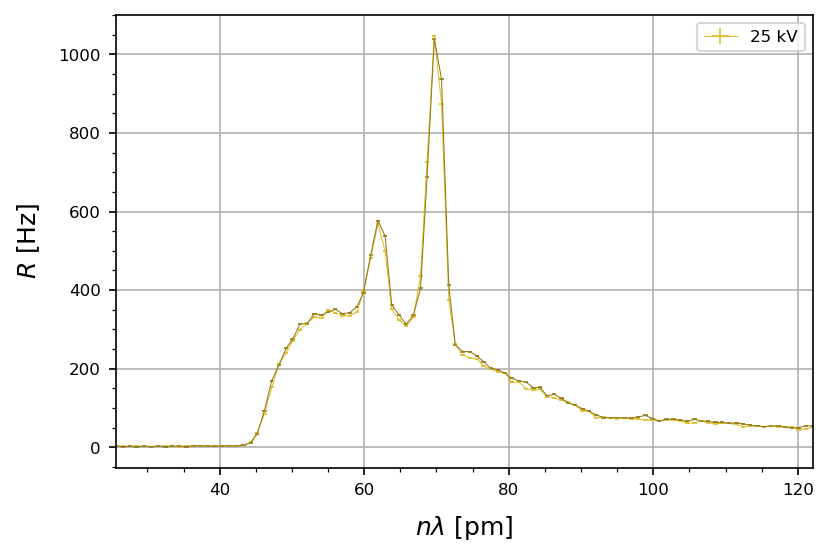

In [12]:
PlotXmanyY_fitOne(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_2 / 1/s'],
         tables['I1mA t2']['R_2 / 1/s']],
    yleg = ['25 kV',None],
    c = [my.color5[2],my.color5_dark[2]],
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    # fileName = path_fig + 'a-I1mA_t1.png' 
)

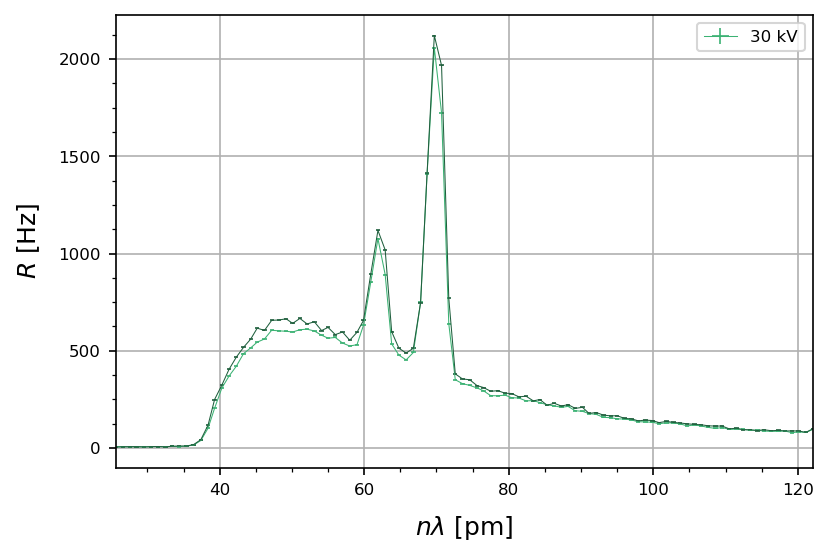

In [13]:
PlotXmanyY_fitOne(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_3 / 1/s'],
         tables['I1mA t2']['R_3 / 1/s']],
    yleg = ['30 kV',None],
    c = [my.color5[3],my.color5_dark[3]],
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    # fileName = path_fig + 'a-I1mA_t1.png' 
)

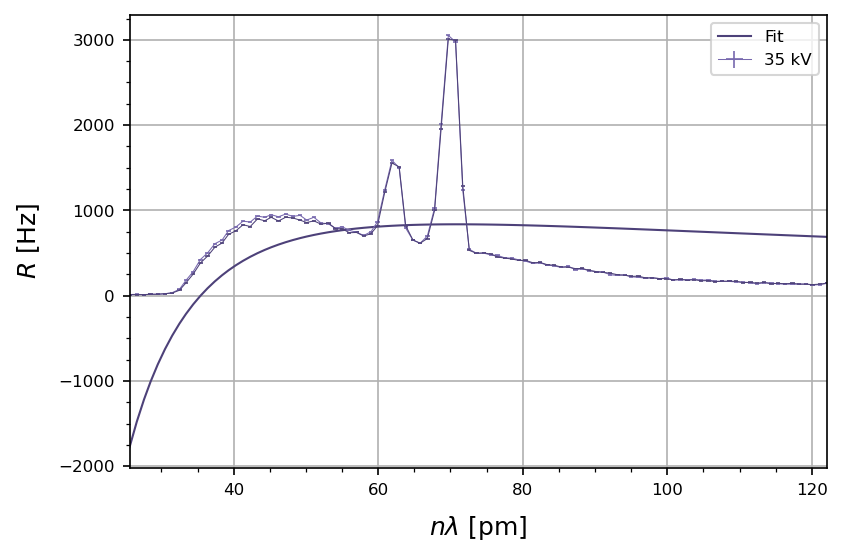

In [154]:
PlotXmanyY_fitOne(
    x = tables['I1mA t1']['n&l / pm'],
    y = [tables['I1mA t1']['R_4 / 1/s'],
         tables['I1mA t2']['R_4 / 1/s']],
    v=35,
    fitMultiply = 100000,
    yleg = ['35 kV',None],
    c = [my.color5[4],my.color5_dark[4]],
    xerr = 0.3,
    yerr = 1,
    xlab ='$n\lambda$ [pm]',
    ylab = '$R$ [Hz]',
    xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
    # fileName = path_fig + 'a-I1mA_t1.png' 
)

Fitting is not working very well. lampeak = 2 lam_min according to Kramer's law, but we dont see that in the data. So, the equation will not provide a good fit. 
* TODO next: get the lam_min, lam_peak, and slope for each line. plot as a func of lam_min and as a func of V. Are there any correlations?